# 建议
### **本节内容虽然是基础，但知识点较为全面系统，适合认真了解打基础，如需要快速入门可从`pyplot`库开始学习**

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 一个简单的例子
Matplotlib将数据绘制在**画布**`Figure`，每个画布都可以包含一个或多个**轴域**`Axes`(一个可以根据x-y坐标或极坐标图中的θ-r、3D坐标图中的x-y-z等指定点的区域）。使用`Axes`创建图形的最简单方法是使用[`pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots). 然后我们可以使用[`Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)在轴上绘制一些数据

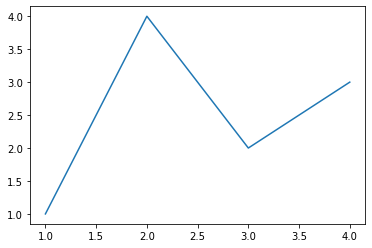

In [6]:
fig, ax = plt.subplots()  # 创建一个包含单个轴域的画布
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # 在轴域上画图

# 画布的组成
以下是Matplotlib画布的组件
<img src="https://matplotlib.org/stable/_images/anatomy.png" width="80%">

### [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)
**画布**跟踪所有子轴、包括**标题**、**图例**、**色条**等，还有嵌套的子画布。
创建新画布的最简单方法是使用pyplot：

<Figure size 432x288 with 0 Axes>

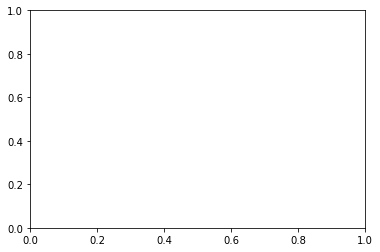

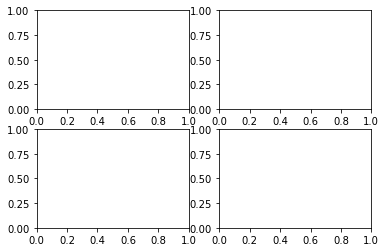

In [19]:
fig = plt.figure()  # 创建一个空画布
fig, ax = plt.subplots()  # 创建一个包含单个轴域的画布
fig, axs = plt.subplots(2, 2)  # 创建一个2x2的画布(包含4个轴域)
# 与画布一起创建轴通常很方便，但以后也可以手动添加轴。

### [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)
一个**轴域**是画布上展示数据的地方，通常包含2个或3个**轴**(`Axis`)，注意**轴域**`Axes`和**轴**`Axis`的区别

### [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)
在**轴**`Axis`上可以设置很多属性，**刻度**、**间距**、**大小**、**标签**等等

### [Artist](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)
1.简单的`Artist`对象是标准的绘图元件，例如Line2D，Rectangle，Text，AxesImage等<br>
2.容器类型包含多个Artist对象使他们组织成一个整体例如Axis，Axes，Figure对象

利用Artist对象进行绘图的流程分为如下三步
1. 创建Figure对象
2. 为Figure对象创建一个或多个Axes对象
3. 调用Axes对象的方法来创建各种简单的Artist对象

Artist对象有许多属性控制其显示效果，例如Figure，Axes对象都有patch属性作为背景

# 画图函数的输入类型
绘图函数期望`numpy.array`或者 `numpy.ma.masked_array`作为输入，或是能传递给`numpy.asarray`的对象。但例如`pandas`数据对象和 `numpy.matrix` 等类似于数组（'array-like'）的类可能无法按预期工作。通常一般将其转换为`numpy.array`
```python
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```
大多数方法可解析可寻址对象，如`dict`、`numpy.recarray`或`pandas.DataFrame`。 Matplotlib 允许提供<font color=red>data</font>关键字参数传递与x和y变量来画图。

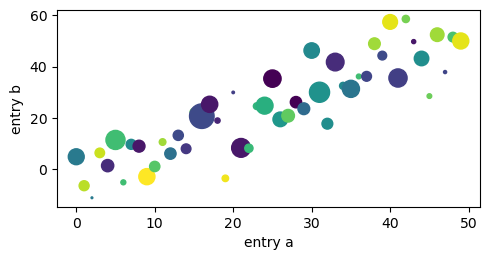

In [28]:
np.random.seed(19680801)  # 设置随机数生成器种子.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)  # dpi是设置图像分辨率
ax.scatter('a', 'b', c='c', s='d', data=data)  # 画散点图
ax.set_xlabel('entry a')  # 设置x轴标签
ax.set_ylabel('entry b')  # 设置y轴标签
plt.tight_layout() # 自动调整

# 编码风格

基本上有两种使用 Matplotlib 的方法：
- 显式创建**画布**和**轴域**，并在它们上调用方法(面向对象风格)
- 依靠`pyplot`自动创建和管理图形和轴，并使用`pyplot`函数进行绘图

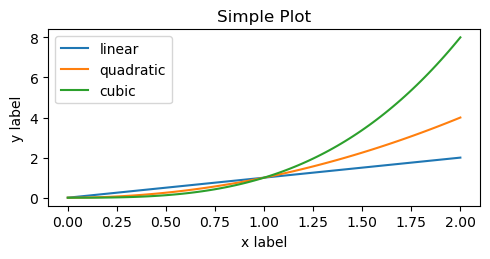

In [37]:
# 面向对象风格OO-style
x = np.linspace(0, 2, 100)
# 注意，即使在面向对象风格中，我们也是用`.pyplot.figure`来创建画布
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  
ax.set_ylabel('y label')  
ax.set_title("Simple Plot")  # 对一个轴域添加一个标题
ax.legend();  # 添加一个图例
plt.tight_layout() 